In [1]:
import os
import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt


In [6]:
for i in os.listdir(r"D:\comp30\RawData\Training\img"):
    filepath=os.path.join(r"D:\comp30\RawData\Training\img",i)
    filepath=os.path.join(filepath,os.listdir(filepath)[0])
    savepath=os.path.join(r"D:\comp30\RawData\Training\img",i)
    savepath2=os.path.join(r"D:\comp30\RawData_hist\origin",i)
    if not os.path.exists(savepath2):
        os.makedirs(savepath2)
        
    image=sitk.ReadImage(filepath)
    print(image.GetSize())
    sitk.WriteImage(image, savepath+r"\ct.mha", True)
    sitk.WriteImage(image, savepath2+r"\ct.mha", True)
    print(savepath)
    print(savepath2)

(512, 512, 147)
D:\comp30\RawData\Training\img\img0001.nii
D:\comp30\RawData_hist\origin\img0001.nii
(512, 512, 139)
D:\comp30\RawData\Training\img\img0002.nii
D:\comp30\RawData_hist\origin\img0002.nii
(512, 512, 198)
D:\comp30\RawData\Training\img\img0003.nii
D:\comp30\RawData_hist\origin\img0003.nii
(512, 512, 140)
D:\comp30\RawData\Training\img\img0004.nii
D:\comp30\RawData_hist\origin\img0004.nii
(512, 512, 117)
D:\comp30\RawData\Training\img\img0005.nii
D:\comp30\RawData_hist\origin\img0005.nii
(512, 512, 131)
D:\comp30\RawData\Training\img\img0006.nii
D:\comp30\RawData_hist\origin\img0006.nii
(512, 512, 163)
D:\comp30\RawData\Training\img\img0007.nii
D:\comp30\RawData_hist\origin\img0007.nii
(512, 512, 148)
D:\comp30\RawData\Training\img\img0008.nii
D:\comp30\RawData_hist\origin\img0008.nii
(512, 512, 149)
D:\comp30\RawData\Training\img\img0009.nii
D:\comp30\RawData_hist\origin\img0009.nii
(512, 512, 148)
D:\comp30\RawData\Training\img\img0010.nii
D:\comp30\RawData_hist\origin\im

In [5]:
def histeq(data,nbr_bins = 2048):
    """对一幅灰度图像进行直方图均衡化"""
    #计算图像的直方图
    #在numpy中，也提供了一个计算直方图的函数histogram(),第一个返回的是直方图的统计量，第二个为每个bins的中间值
    imhist,bins = np.histogram(data,nbr_bins,normed= True)
    imhist=imhist*0.75+0.25/2048

    #print("bins:",bins[:-1])
    cdf = imhist.cumsum()   #

    plt.figure("tryshow")
    #plt.bar(range(len(imhist)),imhist)  
    plt.plot(cdf*2048)
    plt.xlabel("HU")
    plt.ylabel("New HU")
    plt.savefig(savepath+r"\change.png")
    plt.clf()
    
    #print("cdf:",cdf)
    cdf = 2048.0 * cdf / cdf[-1]
    #print("cdf:",cdf)
    #使用累积分布函数的线性插值，计算新的像素值
    im2 = np.interp(data,bins[:-1],cdf)
    return im2,cdf



array_shape=[]
array_path=[]
array_originmax=[]
array_originmin=[]
array_histmax=[]
array_histmin=[]

for i in os.listdir(r"D:\comp30\RawData\Training\img"):
    filepath=os.path.join(r"D:\comp30\RawData\Training\img",i)
    filepath=os.path.join(filepath,os.listdir(filepath)[0])
    print(filepath)
    savepath=os.path.join(r"D:\comp30\RawData_hist\hist0_75big",i)
    if not os.path.exists(savepath):
        os.makedirs(savepath) 
    
    
    image=sitk.ReadImage(filepath)    
    inputimagearray=sitk.GetArrayFromImage(image)

    array_path.append(i)
    array_shape.append(inputimagearray.shape)
    array_originmax.append(np.max(inputimagearray))
    array_originmin.append(np.min(inputimagearray))
    
    
    labelarry=inputimagearray
    labelarry=labelarry.flatten()
    n, bins, patches = plt.hist(labelarry, bins=1024, normed=1,edgecolor='None',facecolor='red')  
    plt.savefig(savepath+r"\original.png")
    plt.clf()
    print("saveing original")
    labelarry=labelarry+1024
    
    processed=[]
    cleanarrayindex=[]
    labelarry[labelarry < 1] = 0
    labelarry[labelarry > 2048] = 2048
    for index,elem in enumerate(labelarry):
        if elem != 0 :
            processed.append(elem)
            cleanarrayindex.append(index)
    
    n, bins, patches = plt.hist(processed, bins=1024, normed=1,edgecolor='None',facecolor='red')  
    plt.savefig(savepath+r"\processed.png")
    plt.clf()
    print("saveing processed")
    
    data2,cdf = histeq(processed)
    n, bins, patches = plt.hist(data2, bins=1024, normed=1,edgecolor='None',facecolor='green')  
    plt.savefig(savepath+r"\hist1.png")
    plt.clf()
    
    labelarry[cleanarrayindex]=data2
    labelarry=(labelarry-1024)*30
    array_histmax.append(np.max(labelarry))
    array_histmin.append(np.min(labelarry))
    
    outimagearray=labelarry.reshape(inputimagearray.shape)
    outimage = sitk.GetImageFromArray(outimagearray.astype(np.int32))
    outimage.SetOrigin(image.GetOrigin())
    outimage.SetSpacing(image.GetSpacing())
    outimage.SetDirection(image.GetDirection())
    sitk.WriteImage(outimage, savepath+r"\hist_ct.mha", True)
    
list_df=pd.DataFrame({'path':array_path,'shape':array_shape,'origin max':array_originmax,
                      'origin min':array_originmin,'hist max':array_histmax,'hist min':array_histmin})
list_df

D:\comp30\RawData\Training\img\img0001.nii\ct.mha
saveing original
saveing processed


c:\users\vmlab\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


D:\comp30\RawData\Training\img\img0002.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0003.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0004.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0005.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0006.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0007.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0008.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0009.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0010.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0021.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0022.nii\ct.mha
saveing original
saveing processed
D:\comp30\RawData\Training\img\img0023.nii\ct.mha
saveing origina

,path,shape,origin max,origin min,hist max,hist min
0,img0001.nii,"(147, 512, 512)",2639,-1024,30720,-30720
1,img0002.nii,"(139, 512, 512)",2976,-1024,30720,-30720
2,img0003.nii,"(198, 512, 512)",2976,-1024,30720,-30720
3,img0004.nii,"(140, 512, 512)",2976,-1024,30720,-30720
4,img0005.nii,"(117, 512, 512)",2861,-1024,30720,-30720
5,img0006.nii,"(131, 512, 512)",3071,-1024,30720,-30720
6,img0007.nii,"(163, 512, 512)",2976,-1024,30720,-30720
7,img0008.nii,"(148, 512, 512)",3071,-1024,30720,-30720
8,img0009.nii,"(149, 512, 512)",3071,-3024,30720,-30720
9,img0010.nii,"(148, 512, 512)",3095,-1000,30720,-18420


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

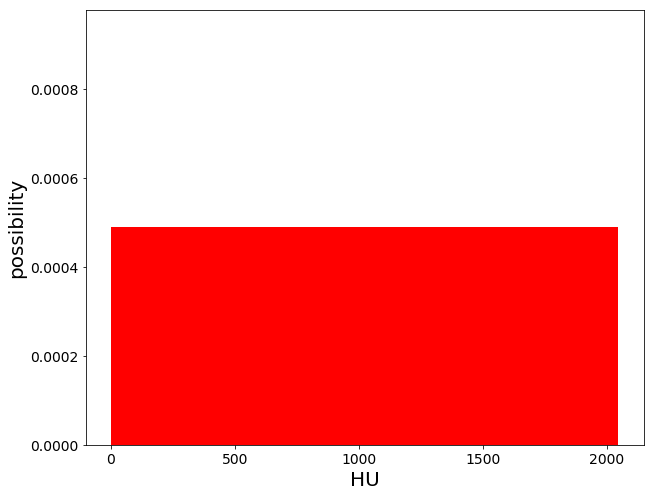

In [15]:
plt.figure(figsize=(10,8))


plt.hist(range(2048), bins=2048, normed=1,edgecolor='None',facecolor='red')  
plt.tick_params(labelsize=14)
plt.xlabel("HU",fontsize=20)
plt.ylabel("possibility",fontsize=20)
plt.ylim([0,2/2048])
#plt.title(u"DICE in training",fontsize=14)


plt.show()